In [1]:
import os
import time
from sklearn.decomposition import PCA
import scipy.io as sio
import numpy as np
import h5py

import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

## Mounting Colab
# from google.colab import drive
# from google.colab import files
# drive.mount('/content/drive')

In [2]:
# def loadData(name):
#   data_path = os.path.join(os.getcwd(),'/content/drive/My Drive/hyperspectralpaper/Data')
#   if name == 'IP':
#     # data = sio.loadmat(os.path.join(data_path,'Indian_pines_corrected.mat'))['indian_pines_corrected']

#     data = sio.loadmat(os.path.join(data_path,'indiancube.mat'))['Data']

#     labels = sio.loadmat(os.path.join(data_path,'Indian_pines_gt.mat'))['indian_pines_gt']

#   elif name == 'PU':
#     # data = sio.loadmat(os.path.join(data_path,'PaviaU.mat'))['paviaU']

#     data = h5py.File('/content/drive/My Drive/hyperspectralpaper/Data/PaviaUwavecube.mat')['Data']
#     data = np.transpose(data,(2,1,0))

#     labels = sio.loadmat(os.path.join(data_path,'PaviaU_gt.mat'))['paviaU_gt']

#   elif name == 'KSC':
#     # data = sio.loadmat(os.path.join(data_path,'KSC.mat'))['KSC']

#     data = h5py.File('/content/drive/My Drive/hyperspectralpaper/Data/KSCwavecube.mat')['Data']
#     data = np.transpose(data,(2,1,0))
    
#     labels = sio.loadmat(os.path.join(data_path,'KSC_gt.mat'))['KSC_gt']

#   return data,labels

In [3]:
def loadData(name):
    data_path = os.path.join(os.getcwd(),'/media/dy113/disk1/Project_xjr/dataset')
    if name == 'IP':
        data = sio.loadmat(os.path.join(data_path, 'IndianPines/Indian_pines_corrected.mat'))['indian_pines_corrected']
        labels = sio.loadmat(os.path.join(data_path, 'IndianPines/Indian_pines_gt.mat'))['indian_pines_gt']
    elif name == 'SA':
        data = sio.loadmat(os.path.join(data_path, 'Salinas/Salinas_corrected.mat'))['salinas_corrected']
        labels = sio.loadmat(os.path.join(data_path, 'Salinas/Salinas_gt.mat'))['salinas_gt']
    elif name == 'PU':
        data = sio.loadmat(os.path.join(data_path, 'PaviaU/PaviaU.mat'))['paviaU']
        labels = sio.loadmat(os.path.join(data_path, 'PaviaU/PaviaU_gt.mat'))['paviaU_gt']
    elif name == 'KSC':
        data = sio.loadmat(os.path.join(data_path, 'KSC/KSC.mat'))['KSC']
        labels = sio.loadmat(os.path.join(data_path, 'KSC/KSC_gt.mat'))['KSC_gt']
    elif name == 'Houston':
        data = sio.loadmat(os.path.join(data_path, '2013_DFTC/huston2013/Houston.mat'))['Houston']
        labels = sio.loadmat(os.path.join(data_path, '2013_DFTC/huston2013/Houston_gt.mat'))['Houston_gt']
    return data, labels

In [4]:
## Global variables
dataset = 'Houston'

In [5]:
X, y = loadData(dataset)
print(X.shape)
print(y.shape)

(1905, 349, 144)
(1905, 349)


In [6]:
def applyPCA(X, numComponents=30):
  newX = np.reshape(X,(-1, X.shape[2]))
  pca = PCA(n_components=numComponents, whiten=True)
  newX = pca.fit_transform(newX)
  newX = np.reshape(newX, (X.shape[0],X.shape[1],numComponents))
  return newX, pca

In [7]:
K = 15
n = K

# X = np.reshape(X,(-1, X.shape[2]))
# pca = PCA(n_components=K, whiten=True)
# start=time.time()
# X = pca.fit_transform(X)
# end=time.time()
# print(end-start)

start=time.time()
Xpca,pca = applyPCA(X, numComponents=K)
end=time.time()
print(end-start)

print(Xpca.shape)
# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_)
A = pca.explained_variance_ratio_
print(A.shape)
pca_sum = A.sum()
print(pca_sum)


5.133852481842041
(1905, 349, 15)
(15,)
0.9997227830817794


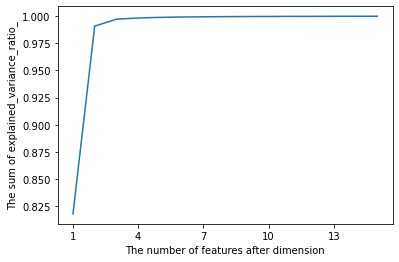

In [8]:
pca_info_sum = np.cumsum(A)
plt.plot(range(1,n+1), pca_info_sum)  # [1, 2, 3, 4]表示选1个特征、2个特征...
plt.xticks(range(1,n+1,3))  # 限制坐标长度
plt.xlabel('The number of features after dimension')
plt.ylabel('The sum of explained_variance_ratio_')
plt.show()

In [9]:
# fig = plt.figure(figsize=(15,15))
# columns = 5
# rows = 6
# pc_images = np.zeros(shape=(X.shape[0],X.shape[1],K))
# for i in range(K):
#   pc_images[:,:,i] = np.reshape(Xpca[:,:,i],(X.shape[0],X.shape[1]))
#   fig.add_subplot(rows,columns,i+1)
#   plt.imshow(pc_images[:,:,i],cmap='gray',interpolation='bicubic')
# plt.show()

In [10]:
# pca_info_sum = np.cumsum(A)
# plt.plot(range(1,K+1), pca_info_sum)  # [1, 2, 3, 4]表示选1个特征、2个特征...
# plt.xticks(range(1,K+1))  # 限制坐标长度
# plt.xlabel('The number of features after dimension')
# plt.ylabel('The sum of explained_variance_ratio_')
# plt.show()

In [11]:
# def applyPCAnum(X):
#   newX = np.reshape(X,(-1, X.shape[2]))
#   pca = PCA(n_components=0.99)
#   newX = pca.fit_transform(newX)
#   newX = np.reshape(newX, (X.shape[0],X.shape[1],newX.shape[1]))
#   return newX, pca

In [12]:
# Xpca,pca = applyPCAnum(X)
# print(Xpca.shape)
# # print(pca.explained_variance_)
# # print(pca.explained_variance_ratio_)
# A = pca.explained_variance_ratio_
# print(A.shape)
# n=A.shape[0]
# print(n)
# print(A.sum())

In [13]:
# pca_info_sum = np.cumsum(A)
# plt.plot(range(1,n+1), pca_info_sum)  # [1, 2, 3, 4]表示选1个特征、2个特征...
# plt.xticks(range(1,n+1,8))  # 限制坐标长度
# plt.xlabel('The number of features after dimension')
# plt.ylabel('The sum of explained_variance_ratio_')
# plt.show()

In [14]:
# fig = plt.figure(figsize=(15,15))
# columns = 5
# rows = 6
# pc_images = np.zeros(shape=(X.shape[0],X.shape[1],K))
# for i in range(K):
#   pc_images[:,:,i] = np.reshape(Xpca[:,:,i],(X.shape[0],X.shape[1]))
#   fig.add_subplot(rows,columns,i+1)
#   plt.imshow(pc_images[:,:,i],cmap='gray',interpolation='bicubic')
# plt.show()